<h1>Projeto de análise de sobrevivente do desastre do Titanic.</h1>
<h2>Uma competição que está disponível no site do Kaggle para os iniciantes</h2>
<h2>https://www.kaggle.com/c/titanic</h2>
<h2>Minha referência e inspiração é o Paulo Vasconcelos</h2>
<h2>https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5</h2>

<h1>Importando as bibliotecas necessárias para o projeto.</h1>

In [120]:
#https://github.com/paulozip/naufragio-titanic/blob/master/Titanic.ipynb

#Biblioteca de maninupação de dados
import pandas as pd #biblioteca para criação de DataFrames
import numpy as np #algebra


#Biblioteca de visualização

import seaborn as sns #graficos mais atraentes
import matplotlib.pyplot as plt #plotagem
import random #seleção de valores aleatórios para plotagem
%matplotlib inline

#Biblioteca de machine learning


<h2>Importando os dados do dataset.</h2>

In [121]:
#lendo o arquivo
df = pd.read_csv("data/train.csv") 

<h2>Contanto linhas e colunas </h2>

In [122]:

print('Este dataset possui %s linhas e %s colunas' % (df.shape[0], df.shape[1]))

Este dataset possui 891 linhas e 12 colunas


<h2> Imprimindo os dados </h2>

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2> Precisamos retiar as colunas que não são importantes para a análise.</h2>

<h3>Para isso vamos usar o comando drop, para retirar como um todo a coluna.</h3>

In [124]:
df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

<h2>Revendo os dados.</h2>

In [125]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<h2>Para deixar as informações mais claras a qualquer leitor, irei renomear as colunas remanescentes.</h2>

In [126]:
df.columns = ['Sobreviveu','Classe','Nome','Sexo','Idade','Irmãos/Cônjuge','Pais/Crianças','Tarifa','Embarque']

In [127]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<h2>Começando a manipular os dados, para que fiquem mais simples para a avaliação</h2>

In [128]:
#trocando os valores numéricos para valores literais na coluna de Sobreviveu sim ou não.
df['Sobreviveu'] = df['Sobreviveu'].replace([0,1],['Não','Sim'])

In [129]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,Não,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [130]:
#Trocando os dados de inglês para portguês
df['Sexo']= df['Sexo'].replace(['male', 'female'],['Masculino', 'Feminino'])

In [131]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,S
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,C
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,S
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,S
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,S


In [132]:
df['Embarque'] = df['Embarque'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])

In [133]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


<h2>Verificando os tipos de dados que estamos trabalhando.</h2>

In [134]:
df.dtypes

Sobreviveu         object
Classe              int64
Nome               object
Sexo               object
Idade             float64
Irmãos/Cônjuge      int64
Pais/Crianças       int64
Tarifa            float64
Embarque           object
dtype: object

<h2>Fazendo a descrição dos dados.</h2>

In [135]:
df.describe()

,Classe,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>Criando uma paleta de cores</h2>

In [136]:
#cores para serem usadas nos gráficos
cores = [
         ['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
         ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
         ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
         ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
         ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
         ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
         ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
        ]

<h2>Iremos criar um gráfico para analisar a quantidade de pessoas que sobreviveram ou não</h2>

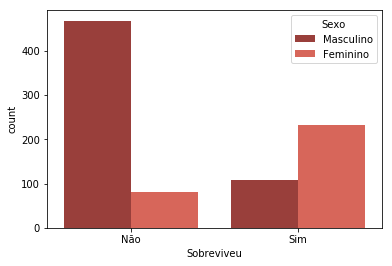

In [191]:
#contando a quantidade de passageiros
passageiros = sns.countplot(data=df, x='Sobreviveu', hue='Sexo', palette='Reds_d')

#posicionando valores acima das barras
for p in passageiros.patches:
    b=p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.05, b.y1 + 20))
    
plt.title('QUANTIDADE DE SOBREVIVENTES/MORTOS\n Total: %s passageiros' % (df.shape[0]))
plt.xlabel('Sobreviveu (Sim ou Não)')
plt.ylabel('Número de sobreviventes')
plt.show()

<h2>Por esse gráfico podemos deduzir que sobreviveram mais mulheres do que homens, sendo que a proporção de homens é maior</h2>

<h2>Vamos medir o quanto isso é apresentado em proporções, levando em consideração que a lei de maioridade da Inglaterra é de 10 anos https://super.abril.com.br/historia/qual-a-idade-da-maioridade/</h2>

<h2>Mas para esse caso, vamos levar a maioridade a partir dos 15 anos de idade.</h2>

In [138]:
prioritarios = (df['Idade'] <= 15) & (df['Idade'] > 0) | (df['Sexo'] =='Feminino')

In [139]:
prioritarios.head()

0    False
1     True
2     True
3     True
4    False
dtype: bool

In [141]:
prioritarios = df[prioritarios]

<h2>Iremos plotar um gráfico que mostra a proporção de pessoas que sobreviveram.</h2>

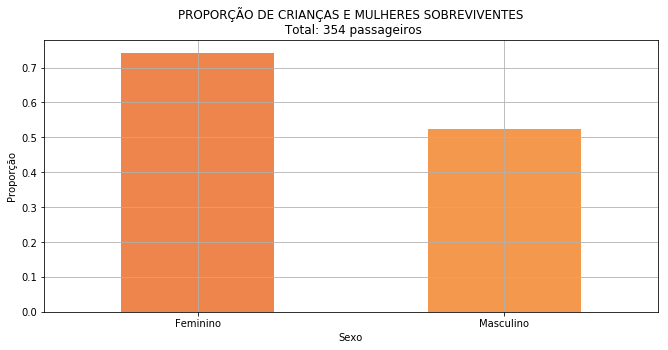

In [149]:


#agrupando os dados de mulheres e crianças que sobreviveram a tragédia. Um gráfico é gerado a partir desses dados
prioritarios.groupby('Sexo')['Sobreviveu'].apply(lambda x: np.mean(x == 'Sim')).plot(kind='bar', color=random.choice(cores), alpha=.7, figsize=(11,5), rot=0, grid=True)

plt.title('PROPORÇÃO DE CRIANÇAS E MULHERES SOBREVIVENTES\n Total: %s passageiros' % (prioritarios.shape[0]))
plt.ylabel('Proporção')
plt.show()

<h3>

Através do gráfico acima, podemos ver que mais de 70% das mulheres (incluindo adultos e crianças) sobreviveram a tragédia. Já quando olhamos para os tripulantes masculinos, o número muda um pouco, onde apenas 52% das crianças do sexo masculino sobreviveram, ou seja, quase metade deles morreram no naufrágio.

Esses dados me deixaram curioso: será que o número de sobreviventes meninas foi muito maior que os sobreviventes meninos?
</h3>

In [151]:
#proporção de sobreviventes meninos e meninas no Titanic

prioritarios[prioritarios['Idade'] <= 15].groupby('Sexo')['Sobreviveu'].apply(lambda x: np.mean(x == 'Sim'))

Sexo
Feminino     0.651163
Masculino    0.525000
Name: Sobreviveu, dtype: float64

<h2>A sobrevivência do que paga mais ?</h2>

In [ ]:
#contando a quantidade de pessoas por classe do návio

In [190]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Crianças,Tarifa,Embarque
0,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,7.2500,Southampton
1,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,71.2833,Cherbourg
2,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,7.9250,Southampton
3,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,53.1000,Southampton
4,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,8.0500,Southampton


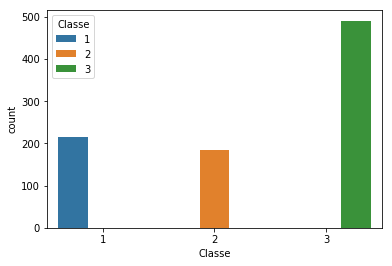

In [198]:
classePlot =  sns.countplot(data = df,x = 'Classe', hue='Classe')

#posicionando valores acima das barras
for p in passageiros.patches:
    b=p.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.05, b.y1 + 20))

<h2>Do gráfico acima tiramos a informação que há mais pessoas na 3ª classe</h2>

<h2>Vamos ver a proporção de pessoas por sexo nas devidas classes </h2>

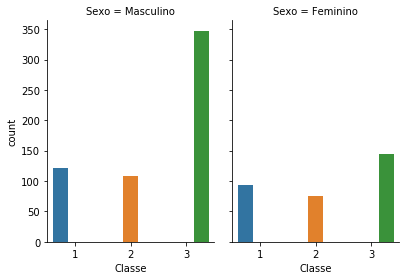

In [208]:
#ax =  sns.countplot(data = df, hue ='Classe', y='Classe')
ax = sns.factorplot(x="Classe", hue="Classe", col="Sexo",data=df, kind="count",size=4, aspect=.7)

<H2>Verificando a quantidade de sobreviventes na relação Sexo por Classe</H2>

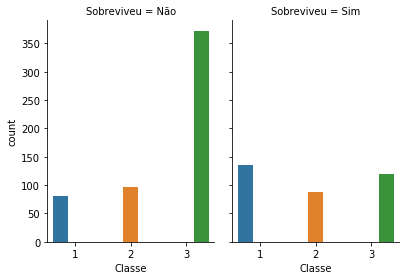

In [204]:
g = sns.factorplot(x="Classe", hue="Classe", col="Sobreviveu",data=df, kind="count",size=4, aspect=.7)

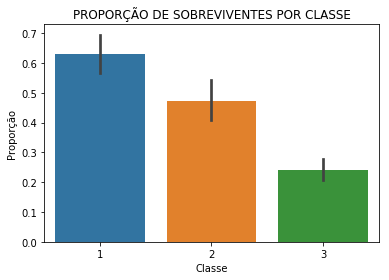

In [183]:
#agrupando a proporção de sobreviventes por classe e gerando um gráfico a partir do resultado
sobreviventes_classe = df.copy()
sobreviventes_classe['Sobreviveu'] = df['Sobreviveu'] == 'Sim'

sns.barplot(data=sobreviventes_classe, y='Sobreviveu', x='Classe')

plt.title('PROPORÇÃO DE SOBREVIVENTES POR CLASSE')
plt.ylabel('Proporção')
plt.show()



<h2>PROPORÇÃO DE SOBREVIVENTES POR CLASSE</h2>

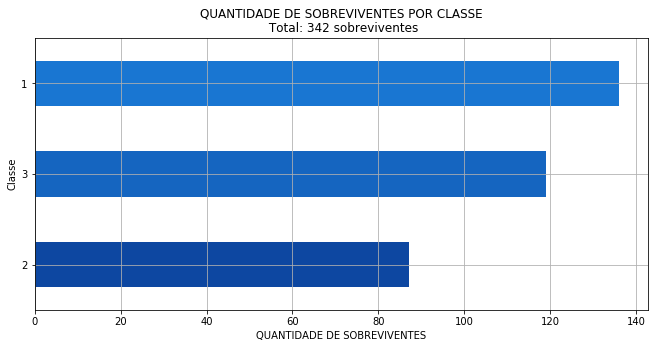

In [160]:
#filtrando o dataset para conter dados apenas de pessoas que sobreviveram
classe_sobrevivente = df[df['Sobreviveu'] == 'Sim']['Classe'].value_counts().sort_values(ascending=True)
classe_sobrevivente.plot(kind='barh', figsize=(11,5), color=random.choice(cores), rot=0, grid=True)

plt.title('QUANTIDADE DE SOBREVIVENTES POR CLASSE\n Total: %s sobreviventes' % (classe_sobrevivente.sum()))
plt.xlabel('QUANTIDADE DE SOBREVIVENTES')
plt.ylabel('Classe')
plt.show()

In [162]:
#quantidade de passageiros (sobreviventes ou não) por classe
df['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

<h2>Verificando a faixa etária das pessoas do návio.</h2>

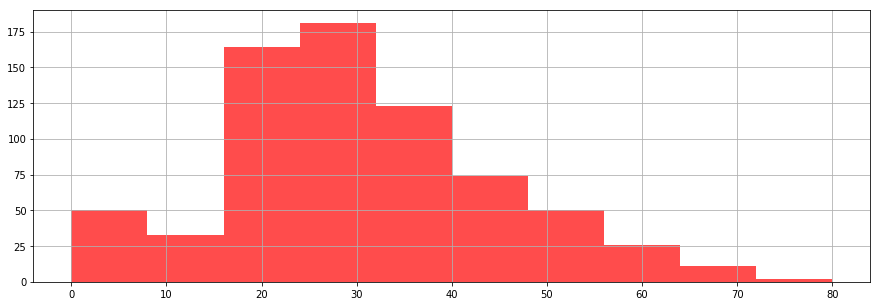

In [181]:
idades = df[df['Idade'] > 0]['Idade'].astype(int).hist(bins=10, figsize=(15,5), color='red', alpha=.7)

<h2> Contando as pessoas que não pagaram o ticket de entrada no návio.<h2>

In [170]:
#em primeiro momento iremos excluir os dados que contenham 0 no valor da coluna idade.

tarifaZero = df[df['Tarifa'] == 0]

In [172]:
tarifaZero.count()

Sobreviveu        15
Classe            15
Nome              15
Sexo              15
Idade              7
Irmãos/Cônjuge    15
Pais/Crianças     15
Tarifa            15
Embarque          15
dtype: int64